# 1. Library

In [1]:
# data is from https://www.kaggle.com/kazanova/sentiment140

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import tensorflow as tf
import re
import gensim
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
nltk.download('stopwords')


stop=set(stopwords.words('english'))
plt.style.use('seaborn')

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import textstat
from textblob import TextBlob 
from tqdm import tqdm
from statistics import *
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taimo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv("./input/training.1600000.processed.noemoticon.csv",encoding='latin1')
print(dataset.shape)
dataset.head()

(1599999, 6)


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Data

In [3]:
dataset = dataset.rename(columns={"0": "target", 
                                  "1467810369": "id",
                                  "Mon Apr 06 22:19:45 PDT 2009": "date",
                                  "NO_QUERY": "flag",
                                  "_TheSpecialOne_": "user",
                                  "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D": "text"})
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


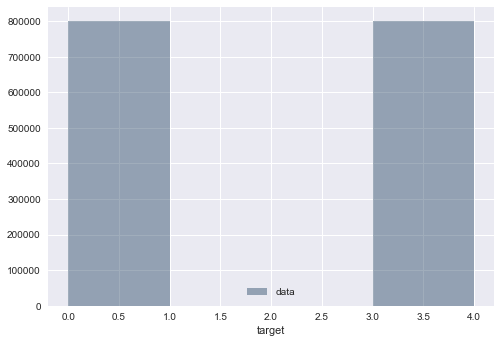

In [4]:
sns.distplot(
    dataset.target, bins=4, color='#123456', label='data',
    kde=False
)
plt.legend()
plt.show()

In [5]:
dataset["target"] = np.where(dataset.target >=3, 1, 0)
dataset.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


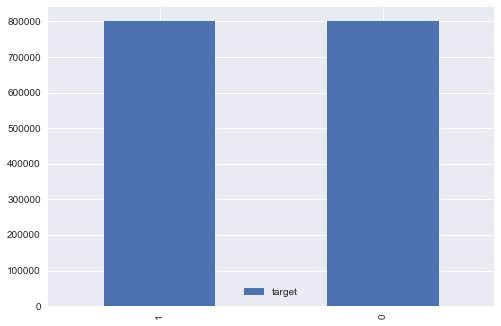

In [6]:
dataset.target.value_counts().plot(kind="bar")
plt.legend()
plt.show()

In [7]:
dataset.describe()

,target,id
count,1599999.0,1.599999e+06
mean,0.5,1.998818e+09
std,0.5,1.935757e+08
min,0.0,1.467811e+09
25%,0.0,1.956916e+09
50%,1.0,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [8]:
# Drop duplicates
dataset.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", dataset.shape)

 Shape of dataframe after dropping duplicates:  (1599999, 6)


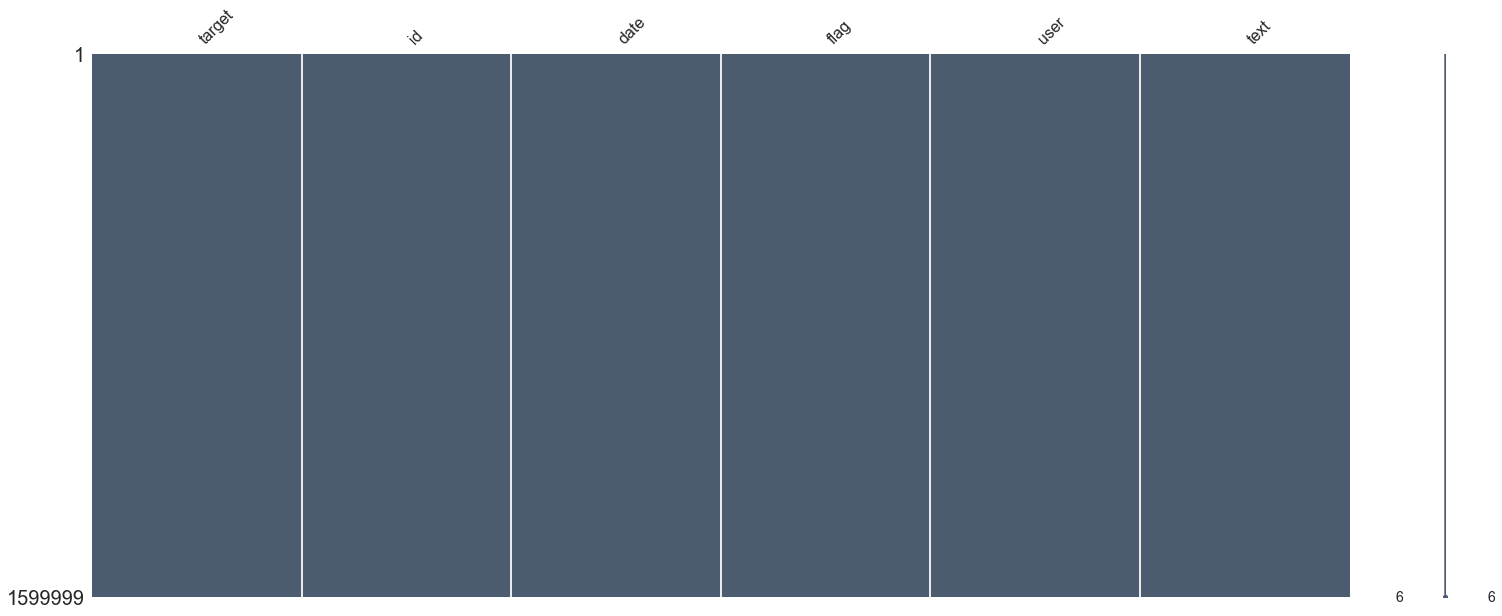

In [9]:
#Missing data as white lines 
import missingno as msno
msno.matrix(dataset,color=(0.3,0.36,0.44))

In [10]:
print('Total Unique Users in this data: {}'.format(dataset['user'].nunique()))
print('Total Unique ID in this data: {}'.format(dataset['id'].nunique()))
print(dataset.target.value_counts())

Total Unique Users in this data: 659775
Total Unique ID in this data: 1598314
1    800000
0    799999
Name: target, dtype: int64


# 3. Target Distribution

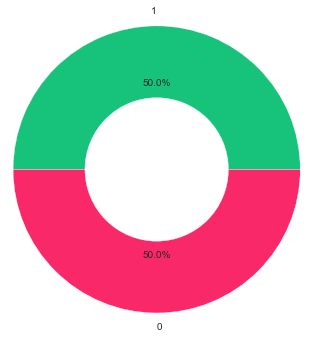

In [11]:
percent_class=dataset.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False).text
labels = dataset.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False).target

colors = ['#17C37B','#F92969','#FACA0C']

my_pie,_,_ = plt.pie(percent_class,radius = 1.2,labels=labels,colors=colors,autopct="%.1f%%")

plt.setp(my_pie, width=0.6, edgecolor='white') 

plt.show()

# 3. Number of characters and words in Text

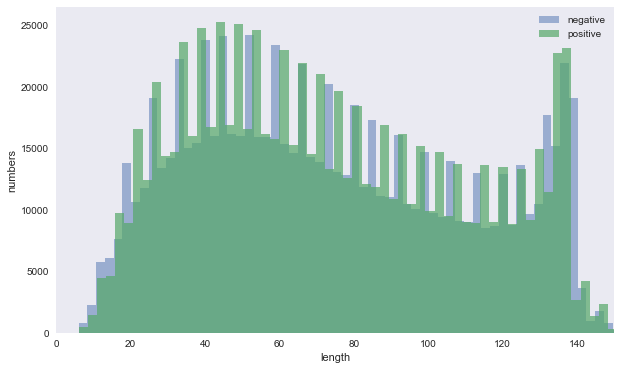

In [12]:
def length(text):    
    '''a function which returns the length of text'''
    
    return len(text)
dataset['length'] = dataset['text'].apply(length)

plt.rcParams['figure.figsize'] = (10.0, 6.0)
bins = 150
plt.hist(dataset[dataset['target'] == 0]['length'], alpha = 0.5, bins=bins, label='negative')
plt.hist(dataset[dataset['target'] == 1]['length'], alpha = 0.7, bins=bins, label='positive')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

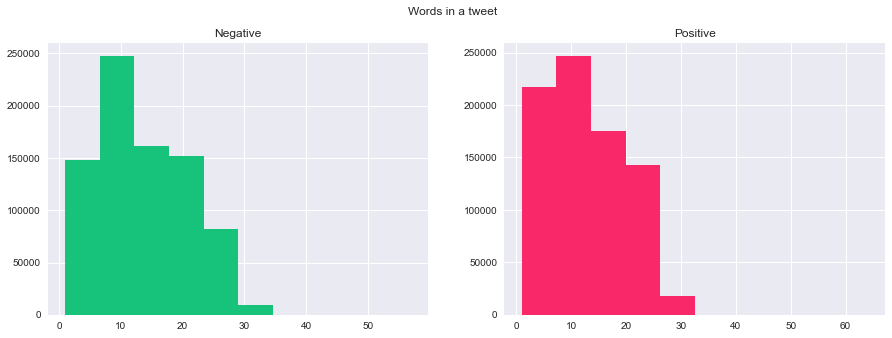

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

tweet_len=dataset[dataset['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Negative')


tweet_len=dataset[dataset['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Positive')

fig.suptitle('Words in a tweet')
plt.show()

Average word length in a tweet

Text(0.5, 0.98, 'Average word length in each tweet')

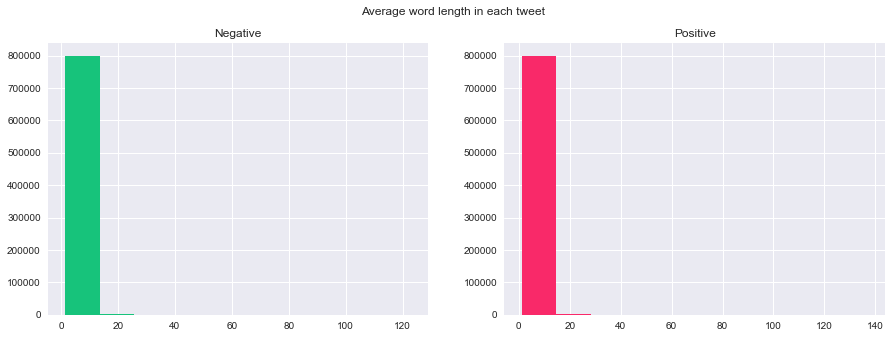

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

word=dataset[dataset['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
ax1.hist(word.map(lambda x: np.mean(x)),color='#17C37B')
ax1.set_title('Negative')

word=dataset[dataset['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
ax2.hist(word.map(lambda x: np.mean(x)),color='#F92969')
ax2.set_title('Positive')

fig.suptitle('Average word length in each tweet')

# 4. Common Stopwords in the tweets

In [15]:
def create_corpus(target):
    corpus=[]
    
    for x in dataset[dataset['target']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

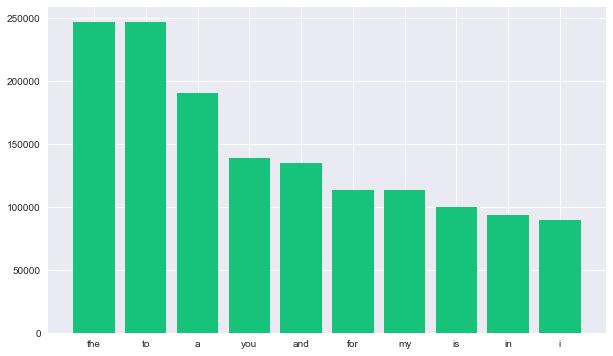

In [16]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

<BarContainer object of 10 artists>

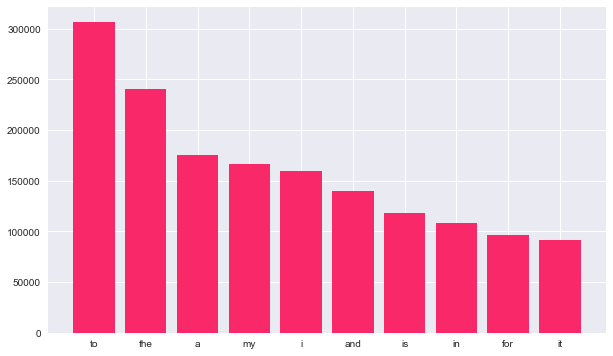

In [17]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
          
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#F92969')

# 5 Common Words and Hashtag

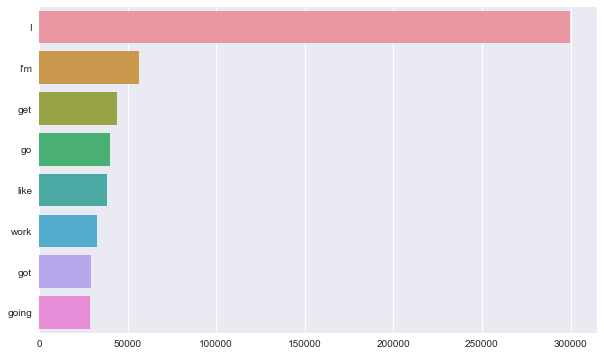

In [18]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

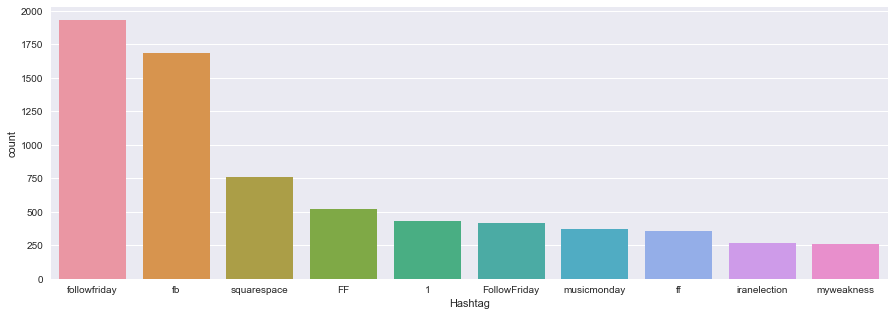

In [19]:
plt.figure(figsize=(15,5))

def find_hash(text):
    line=re.findall(r'(?<=#)\w+',text)
    return " ".join(line)

dataset['hash']=dataset['text'].apply(lambda x:find_hash(x))
temp=dataset['hash'].value_counts()[:][1:11]
temp= temp.to_frame().reset_index().rename(columns={'index':'Hashtag','hash':'count'})
sns.barplot(x="Hashtag",y="count", data = temp)

# 6 Mentions

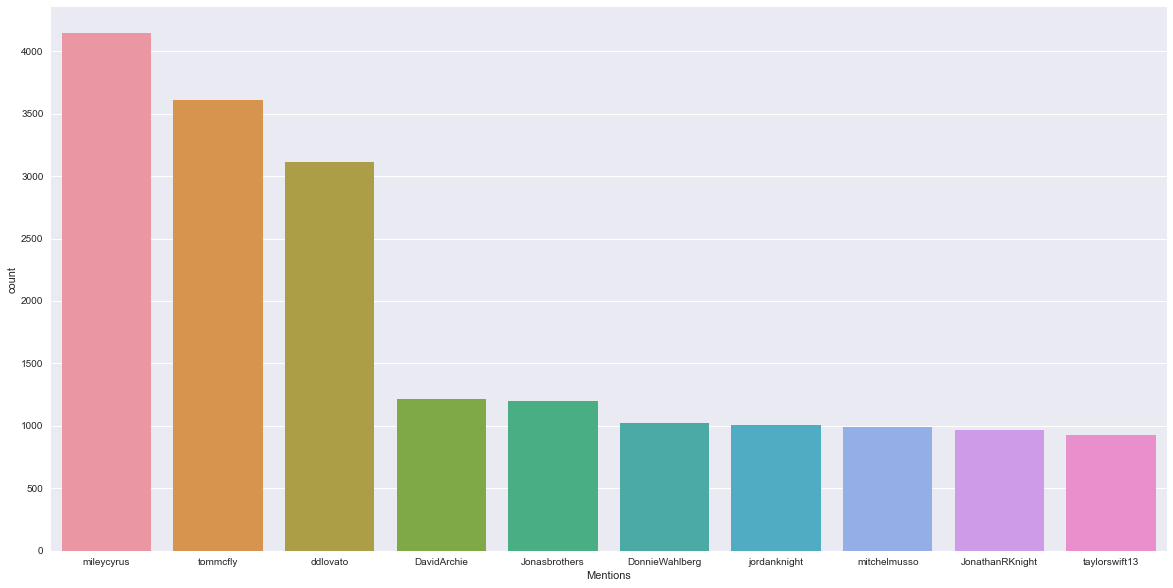

In [20]:
plt.figure(figsize=(20,10))
def mentions(text):
    line=re.findall(r'(?<=@)\w+',text)
    return " ".join(line)
dataset['mentions']=dataset['text'].apply(lambda x:mentions(x))

temp=dataset['mentions'].value_counts()[:][1:11]
temp =temp.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})

sns.barplot(x="Mentions",y="count", data = temp)

# 8 Pre-processing

In [21]:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [22]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 
cleaning = text_strip(dataset['text'])
text = [str(doc) for doc in nlp.pipe(cleaning, batch_size=5000, n_threads=-1)]

In [23]:
text[0]

'is upset that he can update his facebook by texting it and might cry as result school today also blah '

In [24]:
dataset['cleaned_text'] = pd.Series(text)

# 7 N-gram

In [25]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    print((*[token[i:] for i in range(n_gram)]))
    for i in  zip(*[token[i:] for i in range(n_gram)]):
        print(i)
        
    return [' '.join(ngram) for ngram in ngrams]

generate_ngrams(dataset["cleaned_text"].iloc[0], n_gram=3)

['upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah'] ['update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah'] ['facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah']
('upset', 'update', 'facebook')
('update', 'facebook', 'texting')
('facebook', 'texting', 'might')
('texting', 'might', 'cry')
('might', 'cry', 'result')
('cry', 'result', 'school')
('result', 'school', 'today')
('school', 'today', 'also')
('today', 'also', 'blah')


['upset update facebook',
 'update facebook texting',
 'facebook texting might',
 'texting might cry',
 'might cry result',
 'cry result school',
 'result school today',
 'school today also',
 'today also blah']

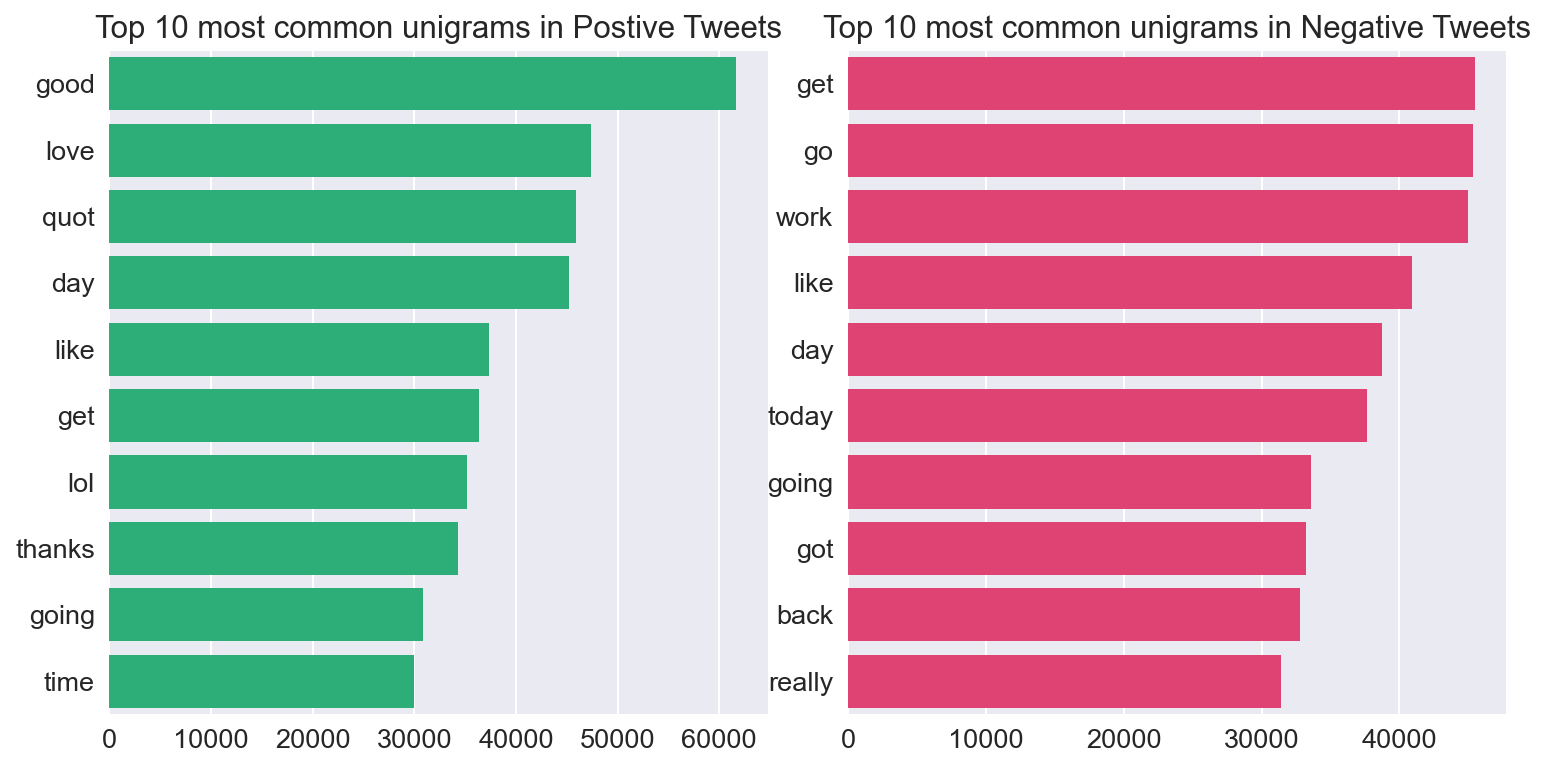

In [26]:


# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 10


positive= dataset["target"]== 1
negative= dataset["target"]== 0


positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

# Unigrams
for tweet in dataset[positive]['cleaned_text']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
        
for tweet in dataset[negative]['cleaned_text']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1

        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(10, 5), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_unigrams[0].values[:N], x=df_positive_unigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_unigrams[0].values[:N], x=df_negative_unigrams[1].values[:N], ax=axes[1], color='#F92969')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in Negative Tweets', fontsize=15)

plt.show()


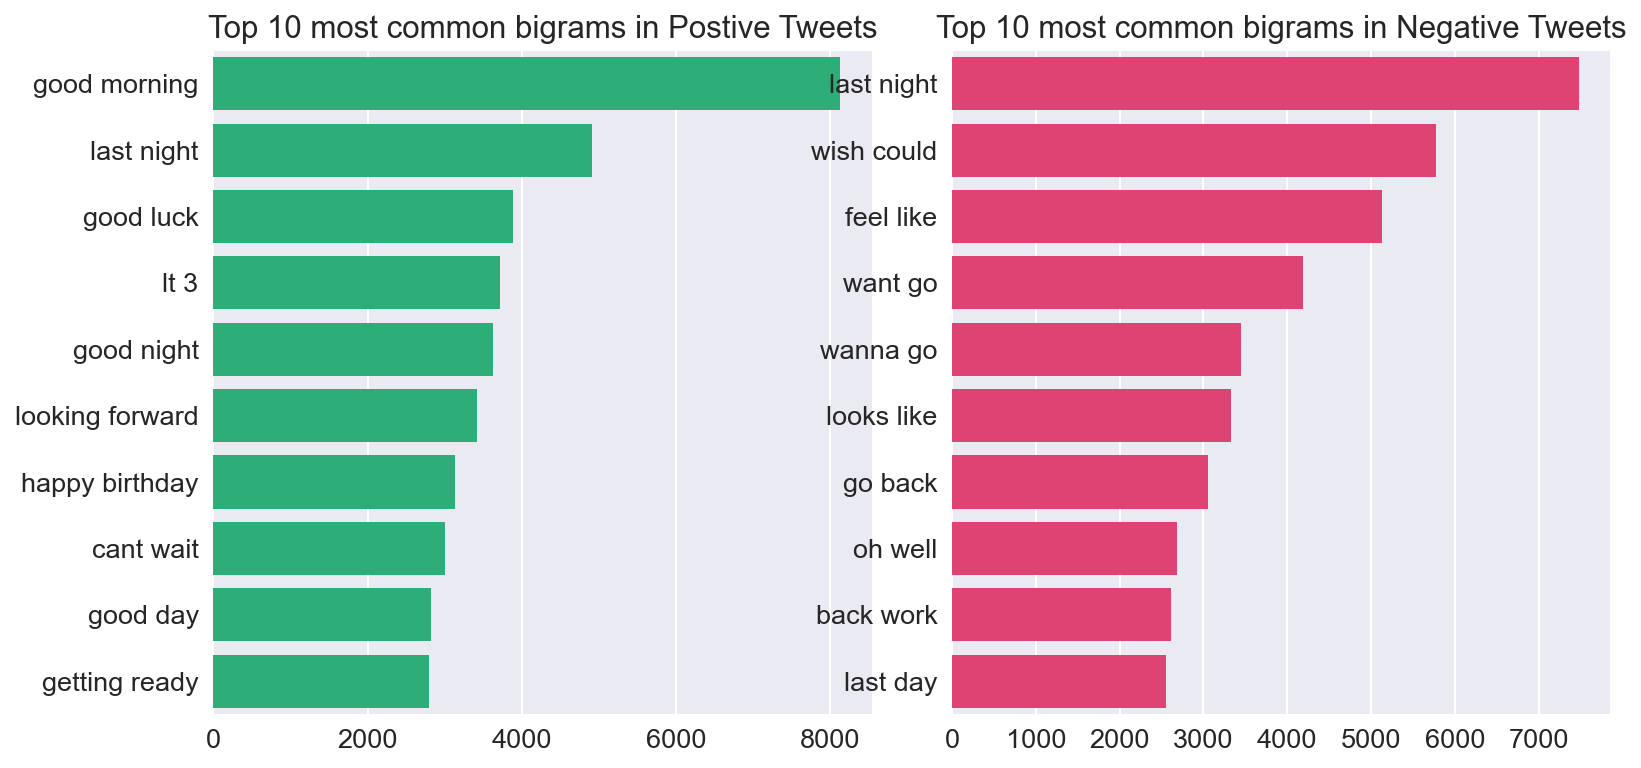

In [27]:
# Bigrams
positive_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

for tweet in dataset[positive]['cleaned_text']:
    for word in generate_ngrams(tweet, n_gram=2):
        positive_bigrams[word] += 1
        
for tweet in dataset[negative]['cleaned_text']:
    for word in generate_ngrams(tweet, n_gram=2):
        negative_bigrams[word] += 1
  
        
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(10, 5), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_bigrams[0].values[:N], x=df_positive_bigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_bigrams[0].values[:N], x=df_negative_bigrams[1].values[:N], ax=axes[1], color='#F92969')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Negative Tweets', fontsize=15)

plt.show()


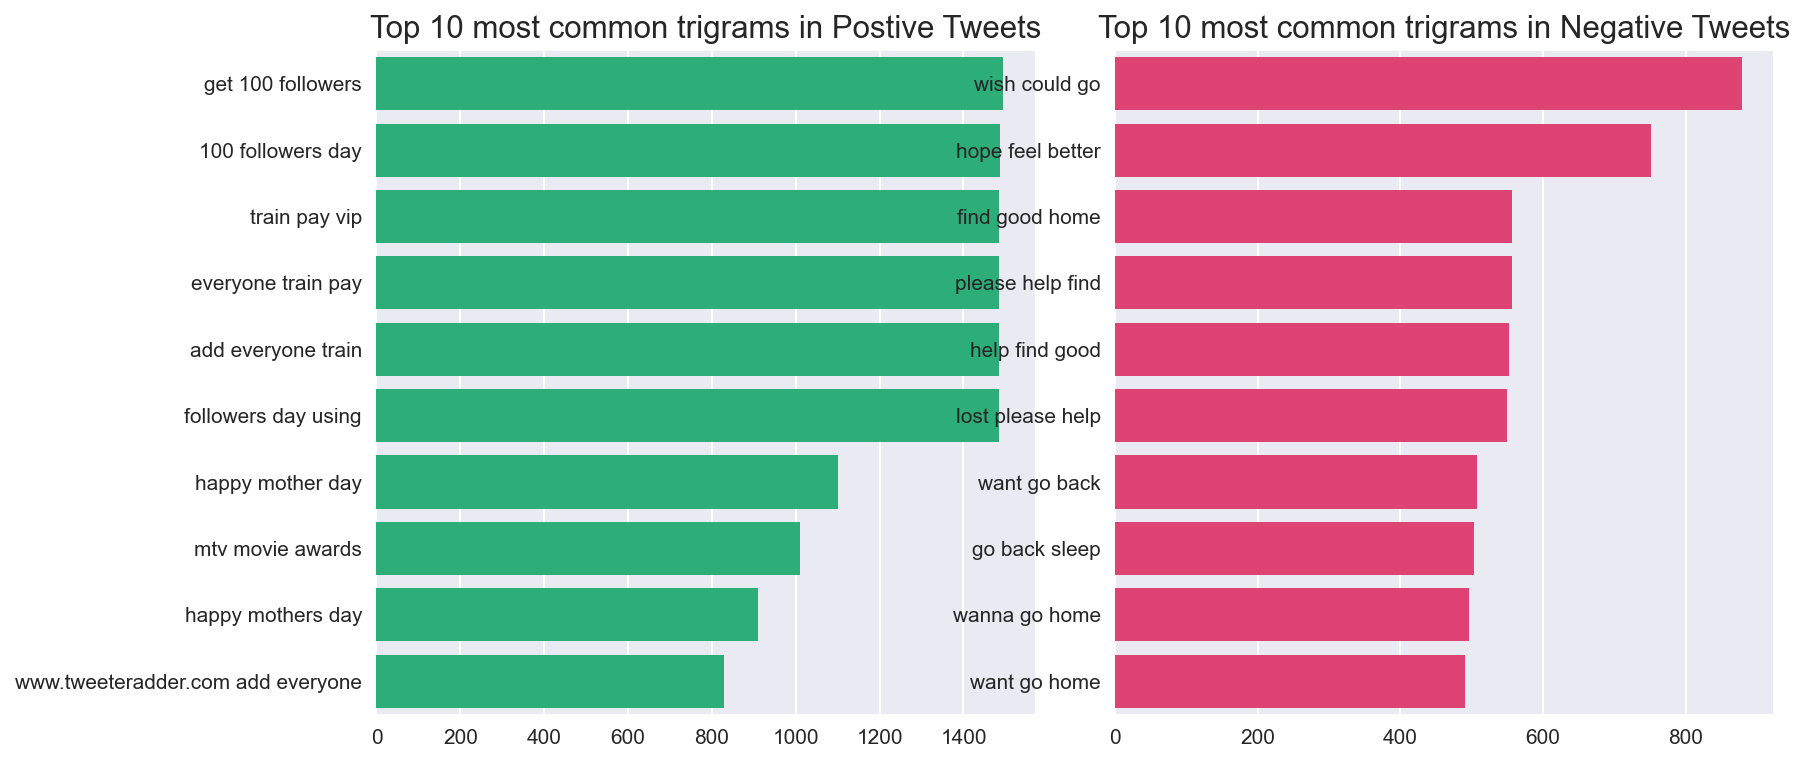

In [28]:
#Trigram
positive_trigrams = defaultdict(int)
negative_trigrams = defaultdict(int)

for tweet in dataset[positive]['cleaned_text']:
    for word in generate_ngrams(tweet, n_gram=3):
        positive_trigrams[word] += 1
        
for tweet in dataset[negative]['cleaned_text']:
    for word in generate_ngrams(tweet, n_gram=3):
        negative_trigrams[word] += 1
  
        
df_positive_trigrams = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_negative_trigrams = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])


fig, axes = plt.subplots(ncols=2, figsize=(10, 5), dpi=150)
plt.tight_layout()

sns.barplot(y=df_positive_trigrams[0].values[:N], x=df_positive_trigrams[1].values[:N], ax=axes[0], color='#17C37B')
sns.barplot(y=df_negative_trigrams[0].values[:N], x=df_negative_trigrams[1].values[:N], ax=axes[1], color='#F92969')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title(f'Top {N} most common trigrams in Postive Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Negative Tweets', fontsize=15)

plt.show()



# Data

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
import gensim
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import * 
from keras.callbacks import *
import math

In [30]:

dataset, noneed = train_test_split(dataset[["cleaned_text", "target"]],train_size=0.9,random_state = 0, shuffle=True,stratify=dataset["target"])
del noneed
train, remaining = train_test_split(dataset,random_state = 0, train_size=0.6,shuffle=True, stratify=dataset["target"])
valid, test = train_test_split(remaining,random_state = 0, train_size=0.5,shuffle=True, stratify=remaining["target"])
train_x, train_y = train["cleaned_text"], train["target"]
test_x, test_y= test["cleaned_text"], test["target"]
valid_x, valid_y=valid["cleaned_text"], valid["target"]
print(test_x.shape, test_y.shape , train_x.shape, train_y.shape ,valid_x.shape, valid_y.shape)

(288000,) (288000,) (863999,) (863999,) (288000,) (288000,)


In [31]:
max_features = 10000
maxlen = 30

In [32]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_x)
tokenized_train = tokenizer.texts_to_sequences(train_x)
train_x = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [33]:
tokenized_test = tokenizer.texts_to_sequences(test_x)
test_x = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [34]:
tokenized_valid = tokenizer.texts_to_sequences(valid_x)
valid_x = sequence.pad_sequences(tokenized_valid, maxlen=maxlen)

In [35]:
EMBEDDING_FILE = './glove_twitter/glove.twitter.27B.50d.txt'

In [36]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [37]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, 50))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [38]:
batch_size = 64
epochs = 5
embed_size = 50

# Transformer

In [39]:
embed_size = 50 
max_features = 10000 
maxlen = 50

In [40]:
import random, os, sys
import numpy as np
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.initializers import *
import tensorflow as tf
from keras.engine.topology import Layer

try:
    from dataloader import TokenList, pad_to_longest
except: pass

class LayerNormalization(Layer):
    def __init__(self, eps=1e-6, **kwargs):
        self.eps = eps
        super(LayerNormalization, self).__init__(**kwargs)
    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:],
                                     initializer=Ones(), trainable=True)
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:],
                                    initializer=Zeros(), trainable=True)
        super(LayerNormalization, self).build(input_shape)
    def call(self, x):
        mean = K.mean(x, axis=-1, keepdims=True)
        std = K.std(x, axis=-1, keepdims=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    def compute_output_shape(self, input_shape):
        return input_shape

class ScaledDotProductAttention():
    def __init__(self, d_model, attn_dropout=0.1):
        self.temper = np.sqrt(d_model)
        self.dropout = Dropout(attn_dropout)
    def __call__(self, q, k, v, mask):
        attn = Lambda(lambda x:K.batch_dot(x[0],x[1],axes=[2,2])/self.temper)([q, k])
        if mask is not None:
            mmask = Lambda(lambda x:(-1e+10)*(1-x))(mask)
            attn = Add()([attn, mmask])
        attn = Activation('softmax')(attn)
        attn = self.dropout(attn)
        output = Lambda(lambda x:K.batch_dot(x[0], x[1]))([attn, v])
        return output, attn

class MultiHeadAttention():
    def __init__(self, n_head, d_model, d_k, d_v, dropout, mode=0, use_norm=True):
        self.mode = mode
        self.n_head = n_head
        self.d_k = d_k
        self.d_v = d_v
        self.dropout = dropout
        if mode == 0:
            self.qs_layer = Dense(n_head*d_k, use_bias=False)
            self.ks_layer = Dense(n_head*d_k, use_bias=False)
            self.vs_layer = Dense(n_head*d_v, use_bias=False)
        elif mode == 1:
            self.qs_layers = []
            self.ks_layers = []
            self.vs_layers = []
            for _ in range(n_head):
                self.qs_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.ks_layers.append(TimeDistributed(Dense(d_k, use_bias=False)))
                self.vs_layers.append(TimeDistributed(Dense(d_v, use_bias=False)))
        self.attention = ScaledDotProductAttention(d_model)
        self.layer_norm = LayerNormalization() if use_norm else None
        self.w_o = TimeDistributed(Dense(d_model))

    def __call__(self, q, k, v, mask=None):
        d_k, d_v = self.d_k, self.d_v
        n_head = self.n_head

        if self.mode == 0:
            qs = self.qs_layer(q)  # [batch_size, len_q, n_head*d_k]
            ks = self.ks_layer(k)
            vs = self.vs_layer(v)

            def reshape1(x):
                s = tf.shape(x)   # [batch_size, len_q, n_head * d_k]
                x = tf.reshape(x, [s[0], s[1], n_head, d_k])
                x = tf.transpose(x, [2, 0, 1, 3])  
                x = tf.reshape(x, [-1, s[1], d_k])  # [n_head * batch_size, len_q, d_k]
                return x
            qs = Lambda(reshape1)(qs)
            ks = Lambda(reshape1)(ks)
            vs = Lambda(reshape1)(vs)

            if mask is not None:
                mask = Lambda(lambda x:K.repeat_elements(x, n_head, 0))(mask)
            head, attn = self.attention(qs, ks, vs, mask=mask)  
                
            def reshape2(x):
                s = tf.shape(x)   # [n_head * batch_size, len_v, d_v]
                x = tf.reshape(x, [n_head, -1, s[1], s[2]]) 
                x = tf.transpose(x, [1, 2, 0, 3])
                x = tf.reshape(x, [-1, s[1], n_head*d_v])  # [batch_size, len_v, n_head * d_v]
                return x
            head = Lambda(reshape2)(head)
        elif self.mode == 1:
            heads = []; attns = []
            for i in range(n_head):
                qs = self.qs_layers[i](q)   
                ks = self.ks_layers[i](k) 
                vs = self.vs_layers[i](v) 
                head, attn = self.attention(qs, ks, vs, mask)
                heads.append(head); attns.append(attn)
            head = Concatenate()(heads) if n_head > 1 else heads[0]
            attn = Concatenate()(attns) if n_head > 1 else attns[0]

        outputs = self.w_o(head)
        outputs = Dropout(self.dropout)(outputs)
        if not self.layer_norm: return outputs, attn
        # outputs = Add()([outputs, q]) # sl: fix
        return self.layer_norm(outputs), attn

class PositionwiseFeedForward():
    def __init__(self, d_hid, d_inner_hid, dropout=0.1):
        self.w_1 = Conv1D(d_inner_hid, 1, activation='relu')
        self.w_2 = Conv1D(d_hid, 1)
        self.layer_norm = LayerNormalization()
        self.dropout = Dropout(dropout)
    def __call__(self, x):
        output = self.w_1(x) 
        output = self.w_2(output)
        output = self.dropout(output)
        output = Add()([output, x])
        return self.layer_norm(output)




def GetPosEncodingMatrix(max_len, d_emb):
    pos_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / d_emb) for j in range(d_emb)] 
        if pos != 0 else np.zeros(d_emb) 
            for pos in range(max_len)
            ])
    pos_enc[1:, 0::2] = np.sin(pos_enc[1:, 0::2]) # dim 2i
    pos_enc[1:, 1::2] = np.cos(pos_enc[1:, 1::2]) # dim 2i+1
    return pos_enc

def GetPadMask(q, k):
    ones = K.expand_dims(K.ones_like(q, 'float32'), -1)
    mask = K.cast(K.expand_dims(K.not_equal(k, 0), 1), 'float32')
    mask = K.batch_dot(ones, mask, axes=[2,1])
    return mask

def GetSubMask(s):
    len_s = tf.shape(s)[1]
    bs = tf.shape(s)[:1]
    mask = K.cumsum(tf.eye(len_s, batch_shape=bs), 1)
    return mask

class Transformer():
    def __init__(self, len_limit, embedding_matrix, d_model=embed_size, \
              d_inner_hid=512, n_head=10, d_k=64, d_v=64, layers=2, dropout=0.1, \
              share_word_emb=False, **kwargs):
        self.name = 'Transformer'
        self.len_limit = len_limit
        self.src_loc_info = False # True # sl: fix later
        self.d_model = d_model
        self.decode_model = None
        d_emb = d_model

        pos_emb = Embedding(len_limit, d_emb, trainable=False, \
                            weights=[GetPosEncodingMatrix(len_limit, d_emb)])

        i_word_emb = Embedding(max_features, d_emb, weights=[embedding_matrix]) # Add Kaggle provided embedding here


        
    def get_pos_seq(self, x):
        mask = K.cast(K.not_equal(x, 0), 'int32')
        pos = K.cumsum(K.ones_like(x, 'int32'), 1)
        return pos * mask

    def compile(self, active_layers=999):
        src_seq_input = Input(shape=(None, ))
        x = Embedding(max_features, embed_size, weights=[embedding_matrix])(src_seq_input)
        x = tf.keras.layers.SpatialDropout1D(0.2)(x)
        # LSTM before attention layers
        x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.4))(x)
        x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.4))(x) 
        
        x, slf_attn = MultiHeadAttention(n_head=6, d_model=300, d_k=64, d_v=64, dropout=0.1)(x, x, x)
        
        avg_pool = GlobalAveragePooling1D()(x)
        max_pool = GlobalMaxPooling1D()(x)
        conc = concatenate([avg_pool, max_pool])
        conc = Dense(64, activation="relu")(conc)
        x = Dense(1, activation="sigmoid")(conc)   
        
        
        self.model = Model(inputs=src_seq_input, outputs=x)
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
s2s = Transformer(50,embedding_matrix, layers=1)
s2s.compile()
model = s2s.model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     500000      input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, None, 50)     0           embedding_2[0][0]                
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, None, 256)    183296      spatial_dropout1d[0][0]          
_______________________________________________________________________________________

In [42]:
history=model.fit(train_x, train_y, batch_size=48, epochs=20, validation_data=(valid_x, valid_y))

Epoch 1/20
18000/18000 [==============================] - 228s 13ms/step - loss: 0.4532 - accuracy: 0.7849 - val_loss: 0.4083 - val_accuracy: 0.8147
Epoch 2/20
18000/18000 [==============================] - 231s 13ms/step - loss: 0.4097 - accuracy: 0.8123 - val_loss: 0.4349 - val_accuracy: 0.8205
Epoch 3/20
18000/18000 [==============================] - 229s 13ms/step - loss: 0.3976 - accuracy: 0.8191 - val_loss: 0.4866 - val_accuracy: 0.8239
Epoch 4/20
18000/18000 [==============================] - 229s 13ms/step - loss: 0.3905 - accuracy: 0.8232 - val_loss: 0.5278 - val_accuracy: 0.8251
Epoch 5/20
18000/18000 [==============================] - 231s 13ms/step - loss: 0.3858 - accuracy: 0.8257 - val_loss: 0.5330 - val_accuracy: 0.8249
Epoch 6/20
18000/18000 [==============================] - 230s 13ms/step - loss: 0.3821 - accuracy: 0.8277 - val_loss: 0.5648 - val_accuracy: 0.8270
Epoch 7/20
18000/18000 [==============================] - 229s 13ms/step - loss: 0.3796 - accuracy: 0.8293

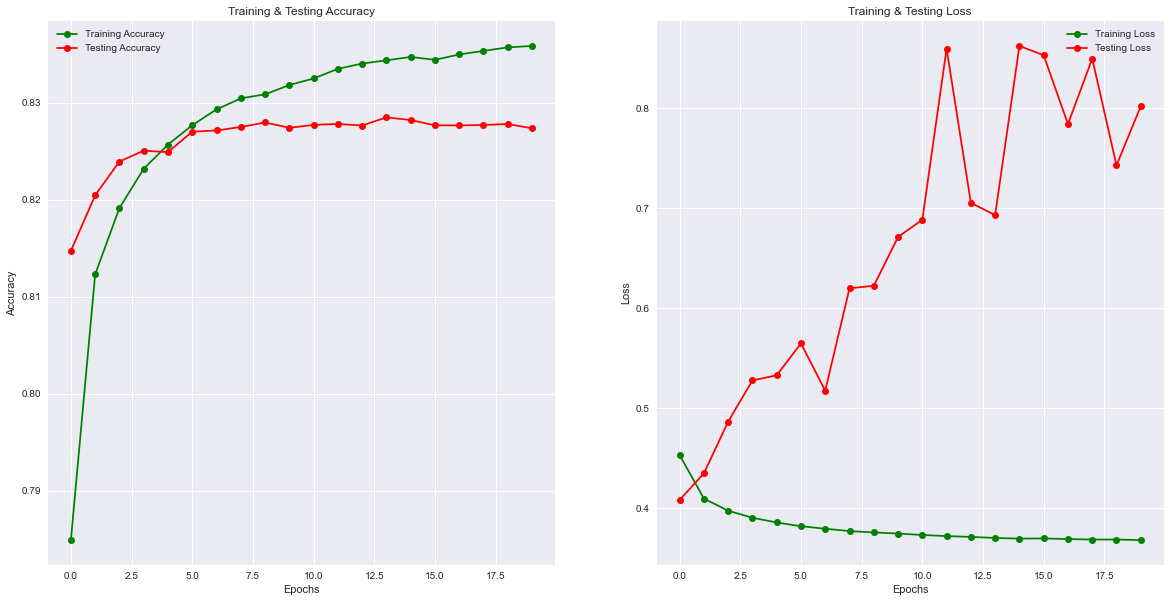

In [43]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [44]:
pred=model.predict(test_x)
pred = np.around(pred, decimals = 0)

In [45]:
print(classification_report(test_y, pred, target_names = ['negative','positive']))
cm = confusion_matrix(test_y,pred)
cm

              precision    recall  f1-score   support

    negative       0.82      0.84      0.83    144000
    positive       0.84      0.81      0.82    144000

    accuracy                           0.83    288000
   macro avg       0.83      0.83      0.83    288000
weighted avg       0.83      0.83      0.83    288000



array([[121160,  22840],
       [ 27211, 116789]], dtype=int64)

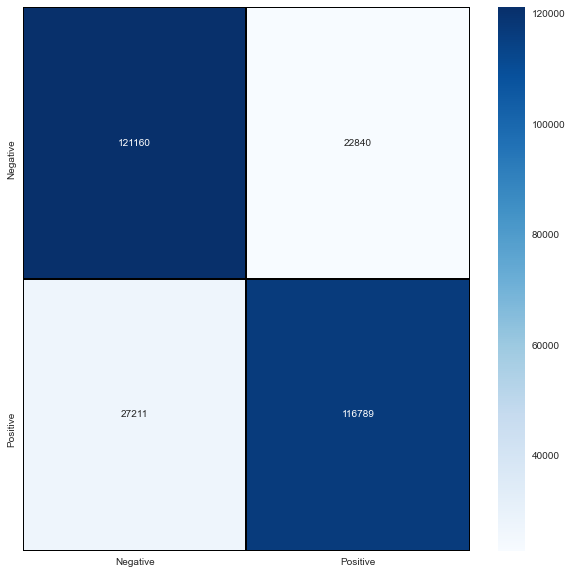

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Negative','Positive'] , yticklabels = ['Negative','Positive'])